In [1]:
# imports
import requests
import json
from dateutil import parser
import pandas as pd
# clearly see columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
import time
import math
import matplotlib.pyplot as plt
import pickle
import seaborn as sb
from collections import Counter
import numpy as np
import time
from IPython.display import clear_output

# use nba_api to fetch data
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType

In [2]:
season_list = ['2020-21', '2021-22', '2022-23']
# season_list = ['2022-23']
# season_list = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

In [3]:
nba_teams = teams.get_teams()
nba_teams_id = [team['id'] for team in nba_teams]
nba_teams_tri= [team['abbreviation'] for team in nba_teams]
nba_teams_name= [team['full_name'] for team in nba_teams]

master_game_dict = dict()
master_game_list = list()

for year in season_list:
    for team in nba_teams_id:
        print("Team: {}, Season: {}".format(nba_teams_tri[nba_teams_id.index(team)], year))
#         create games dataframe
        temp_dp = leaguegamefinder.LeagueGameFinder(team_id_nullable=team, 
                                                    season_nullable=year,
                                                    season_type_nullable=SeasonType.regular).get_data_frames()[0]
        temp_dp.sort_values(by='GAME_ID', inplace=True)
        temp_dp.reset_index(drop=True, inplace=True)
        
        master_game_list.append(temp_dp)
        
        if nba_teams_tri[nba_teams_id.index(team)] in master_game_dict:
            master_game_dict[nba_teams_tri[nba_teams_id.index(team)]].append(temp_dp)
            
        else:
            master_game_dict[nba_teams_tri[nba_teams_id.index(team)]] = [temp_dp]
        
        time.sleep(1.5)
        clear_output(wait=True)

Team: CHA, Season: 2022-23


In [4]:
 master_game_dict['CHA'][0]

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612766,CHA,Charlotte Hornets,0022000010,2020-12-23,CHA @ CLE,L,240,114,45,90,0.500,16,44,0.364,8,15,0.533,8,24,32,29,10,4,15,17,-7.0
1,22020,1610612766,CHA,Charlotte Hornets,0022000022,2020-12-26,CHA vs. OKC,L,239,107,37,93,0.398,13,32,0.406,20,32,0.625,13,34,47,27,11,8,13,22,-2.0
2,22020,1610612766,CHA,Charlotte Hornets,0022000032,2020-12-27,CHA vs. BKN,W,241,106,43,96,0.448,10,34,0.294,10,17,0.588,13,39,52,35,8,3,12,25,2.0
3,22020,1610612766,CHA,Charlotte Hornets,0022000059,2020-12-30,CHA @ DAL,W,240,118,43,84,0.512,15,34,0.441,17,21,0.810,12,38,50,30,6,6,23,28,19.0
4,22020,1610612766,CHA,Charlotte Hornets,0022000069,2021-01-01,CHA vs. MEM,L,241,93,35,86,0.407,9,31,0.290,14,21,0.667,10,32,42,23,9,4,18,15,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,22020,1610612766,CHA,Charlotte Hornets,0022001004,2021-05-07,CHA vs. ORL,W,241,122,44,89,0.494,9,33,0.273,25,33,0.758,11,40,51,28,5,4,11,23,10.0
68,22020,1610612766,CHA,Charlotte Hornets,0022001020,2021-05-09,CHA vs. NOP,L,240,110,42,95,0.442,13,37,0.351,13,18,0.722,11,35,46,22,6,8,17,19,-2.0
69,22020,1610612766,CHA,Charlotte Hornets,0022001047,2021-05-13,CHA vs. LAC,L,239,90,33,84,0.393,9,33,0.273,15,19,0.789,8,27,35,24,9,1,10,15,-23.0
70,22020,1610612766,CHA,Charlotte Hornets,0022001064,2021-05-15,CHA @ NYK,L,265,109,39,102,0.382,13,49,0.265,18,24,0.750,15,36,51,28,5,2,8,18,-9.0


In [5]:
# function to fetch first game day of every season in a list
def get_first_match(game_dict, season_list, nba_teams_tri):
    first_game_list = list()
    for season_index in range(len(season_list)):
        temp_list = list()
        for team in nba_teams_tri:
            temp_list.append(game_dict[team][season_index].loc[0]['GAME_DATE'])
        first_game_list.append(min(temp_list))
    return first_game_list
first_game_list = get_first_match(master_game_dict, season_list, nba_teams_tri)

In [6]:
# craete dict entry for each team, give initial ELO and season start date
teamDict = dict()
for entry in nba_teams_tri:
    tempDict = dict()
    tempDict['tri'] = entry
    tempDict['ELO'] = 1500 
    tempDict['History'] = [{'date': parser.parse(master_game_dict[entry][0].loc[0]['GAME_DATE']).date(), 'ELO': tempDict['ELO']}]
    teamDict[entry] = tempDict

In [7]:
# build intial dataframe detailing all games, split by team
master_games_df = pd.concat(master_game_list)
master_games_df.sort_values(by='GAME_ID', inplace=True)
master_games_df.reset_index(drop=True, inplace=True)
master_games_df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612744,GSW,Golden State Warriors,0022000001,2020-12-22,GSW @ BKN,L,240,99,37,99,0.374,10,33,0.303,15,23,0.652,13,34,47,26,6,6,18,24,-26.0
1,22020,1610612751,BKN,Brooklyn Nets,0022000001,2020-12-22,BKN vs. GSW,W,242,125,42,92,0.457,15,35,0.429,26,32,0.813,13,44,57,24,11,7,20,22,26.0
2,22020,1610612746,LAC,LA Clippers,0022000002,2020-12-22,LAC @ LAL,W,241,116,44,93,0.473,14,40,0.350,14,19,0.737,11,29,40,22,10,3,16,29,7.0
3,22020,1610612747,LAL,Los Angeles Lakers,0022000002,2020-12-22,LAL vs. LAC,L,240,109,38,81,0.469,9,29,0.310,24,31,0.774,8,37,45,22,4,2,19,20,-7.0
4,22020,1610612738,BOS,Boston Celtics,0022000003,2020-12-23,BOS vs. MIL,W,240,122,48,101,0.475,18,40,0.450,8,11,0.727,10,27,37,23,8,6,6,17,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,22022,1610612742,DAL,Dallas Mavericks,0022200115,2022-11-02,DAL vs. UTA,W,240,103,42,84,0.500,11,38,0.289,8,15,0.533,7,30,37,20,9,4,11,14,3.0
4850,22022,1610612763,MEM,Memphis Grizzlies,0022200116,2022-11-02,MEM @ POR,W,241,111,38,83,0.458,13,28,0.464,22,27,0.815,10,36,46,28,7,5,14,19,5.0
4851,22022,1610612757,POR,Portland Trail Blazers,0022200116,2022-11-02,POR vs. MEM,L,240,106,36,89,0.404,13,33,0.394,21,26,0.808,16,30,46,27,5,3,20,17,-5.0
4852,22022,1610612740,NOP,New Orleans Pelicans,0022200117,2022-11-02,NOP @ LAL,L,266,117,47,102,0.461,8,25,0.320,15,21,0.714,11,40,51,35,10,5,13,20,-3.0


In [8]:
# api to fetch boxscores by game id
from nba_api.live.nba.endpoints import boxscore

# list that contains all game stats 
master_games_stats_list = list()

# list of all games by their id,. sorted 
game_id_list = set([master_games_df['GAME_ID'] for game in master_games_df][0])
game_id_list = list(game_id_list)
game_id_list.sort()

# index used to detect change in season
season_index = 0

# loop to calculate team ELO per game / saeson
for game_id in game_id_list:
    
    box = boxscore.BoxScore(game_id) 
    
    if box.get_dict()['meta']['code'] == 200:
        # game id
        game_id = box.get_dict()['game']['gameId']
        # game date
        game_date = parser.parse(box.get_dict()['game']['gameTimeUTC']).date()
        # team code
        home_tri = box.get_dict()['game']['homeTeam']['teamTricode']
        away_tri = box.get_dict()['game']['awayTeam']['teamTricode']

        print('game id: {} \t home team: {} \t away team: {}'.format(game_id, home_tri, away_tri))

        # team stats
        box_home = box.get_dict()['game']['homeTeam']['statistics']
        box_away = box.get_dict()['game']['awayTeam']['statistics']

        if game_date >= parser.parse(first_game_list[season_index]).date(): 
            if season_index < (len(first_game_list) - 1):
                if game_date >= parser.parse(first_game_list[season_index + 1]).date():
                    print('Season Change')
                    # season change
                    season_index = season_index + 1
                    for teamKey in list(teamDict.keys()):
                        teamDict[teamKey]['ELO'] = (teamDict[teamKey]['ELO'] * 0.75) + (0.25 * 1505)

            if box_home['points'] > box_away['points']: # home team win 
                print('home win', '\n')
            # Winner  ELO
                # S Team
                Steam = 1
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[away_tri]['ELO'] - teamDict[home_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[home_tri]['ELO']
                # k
                MOV = int(box_home['points']) - int(box_away['points'])
                ################## Error Maybe Here ##################
                # ELO_diff
                ELOdiff = teamDict[home_tri]['ELO'] + 100 - teamDict[away_tri]['ELO']
                k = 20 * (pow((MOV + 3),0.8) / (7.5 + (0.006 * (ELOdiff))))
                ######################################################
                # Ri+1
                WinnerRii = Ri + (k * (Steam - Eteam))

            # Loser ELO
                # S Team
                Steam = 0
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[home_tri]['ELO'] - teamDict[away_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[away_tri]['ELO']
                # Ri+1
                LoserRii = Ri + (k * (Steam - Eteam))

                print('Home ELO: {} \t Away ELO: {}'.format(WinnerRii, LoserRii))

            # Setting new ELO   
                box_home['team_elo'] = teamDict[home_tri]['ELO']
                box_home['opp_elo'] = teamDict[away_tri]['ELO']
                box_away['team_elo'] = teamDict[away_tri]['ELO']
                box_away['opp_elo'] = teamDict[home_tri]['ELO']

            # Winner 
                box_home['game_id'] = game_id
                box_home['game_date'] = game_date 
                box_home['home'] = 1
                box_home['team_name'] = home_tri   
                box_home['opp_name'] = away_tri   
                box_home['win'] = 1
                teamDict[home_tri]['ELO'] = math.floor(WinnerRii)
            # Loser
                box_away['game_id'] = game_id
                box_away['game_date'] = game_date 
                box_away['team_name'] = away_tri  
                box_away['opp_name'] = home_tri
                box_away['home'] = 0
                box_away['win'] = 0
                teamDict[away_tri]['ELO'] = math.floor(LoserRii)

            elif box_home['points'] < box_away['points']: # home lose
                print('away win', '\n')

            # Winner  ELO
                # S Team
                Steam = 1
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[home_tri]['ELO'] - teamDict[away_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[away_tri]['ELO']
                # k
                MOV = int(box_away['points']) - int(box_home['points'])
                ################## Error Maybe Here ##################
                # ELO_diff
                ELOdiff = (teamDict[home_tri]['ELO'] + 100 - teamDict[away_tri]['ELO']) * (-1)
                k = 20 * (pow((MOV + 3),0.8) / (7.5 + (0.006 * (ELOdiff))))
                ######################################################
                # Ri+1
                WinnerRii = Ri + (k * (Steam - Eteam))
            # Loser ELO
                # S Team
                Steam = 0
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[away_tri]['ELO'] - teamDict[home_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[home_tri]['ELO'] ## CHECK THIS 
                # Ri+1
                LoserRii = Ri + (k * (Steam - Eteam))

                print('Home ELO: {} \t Away ELO: {}'.format(WinnerRii, LoserRii))

            # Setting new ELO
                box_away['team_elo'] = teamDict[away_tri]['ELO']
                box_away['opp_elo'] = teamDict[home_tri]['ELO']
                box_home['team_elo'] = teamDict[home_tri]['ELO']
                box_home['opp_elo'] = teamDict[away_tri]['ELO']

            # Winner 
                box_away['game_id'] = game_id 
                box_away['game_date'] = game_date 
                box_away['team_name'] = away_tri  
                box_away['opp_name'] = home_tri
                box_away['home'] = 0       
                box_away['win'] = 1
                teamDict[away_tri]['ELO'] = math.floor(WinnerRii)
            # Loser
                box_home['game_id'] = game_id
                box_home['game_date'] = game_date 
                box_home['team_name'] = home_tri   
                box_home['opp_name'] = away_tri  
                box_home['home'] = 1
                box_home['win'] = 0 
                teamDict[home_tri]['ELO'] = math.floor(LoserRii)        

        # Setting Historical ELO
            teamDict[home_tri]['History'].append({'date': game_date, 
                                                  'ELO': box_home['team_elo']})
            teamDict[away_tri]['History'].append({'date': game_date, 
                                                  'ELO': box_away['team_elo']})
            master_games_stats_list.append(box_home)
            master_games_stats_list.append(box_away)

            time.sleep(0.5)
            clear_output(wait=True)

game id: 0022200117 	 home team: LAL 	 away team: NOP
home win 

Home ELO: 1371.9427994798477 	 Away ELO: 1494.0572005201523


In [9]:
# dataframe that contains all game stats and team ELO
df = pd.DataFrame(master_games_stats_list)
df.sort_values(by=(['game_date', 'game_id']), inplace=True)
# df=df.dropna().reset_index(drop=True)
df

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestLeadScore,biggestScoringRun,biggestScoringRunScore,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,minutes,minutesCalculated,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timeLeading,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win
0,24,1.200000,54,38,78-116,11,49-80,7,6,19,9,0.473684,92,0.538043,42,0.456522,6,24,22,16,0,0,32,26,0.812500,1,PT240M00.00S,PT240M,125,99,28,23,46,45,23,0.511111,21,44,13,57,8,2,6,65,13,7,0.538462,11,35,15,0.428571,PT46M49.00S,1,106.08,0.589178,20,0,20,57,27,0.473684,1500.0,1500.0,0022000001,2020-12-23,1,BKN,GSW,1
1,26,1.444444,35,2,2-0,11,49-80,6,7,8,5,0.625000,99,0.424242,37,0.373737,2,22,24,22,0,0,23,15,0.652174,1,PT240M00.00S,PT240M,99,125,12,19,44,52,22,0.423077,21,34,13,47,14,3,11,61,14,8,0.571429,6,33,10,0.303030,PT00M38.00S,1,109.12,0.453629,18,0,18,66,27,0.409091,1500.0,1500.0,0022000001,2020-12-23,0,GSW,BKN,0
2,22,1.157895,46,0,NaN,10,41-30,2,3,8,5,0.625000,81,0.524691,38,0.469136,3,29,20,17,0,0,31,24,0.774194,0,PT240M00.00S,PT240M,109,116,12,19,38,36,19,0.527778,9,37,8,45,10,1,9,55,5,3,0.600000,4,29,9,0.310345,PT00M00.00S,1,94.64,0.575866,19,0,19,52,29,0.557692,1500.0,1500.0,0022000002,2020-12-23,1,LAL,LAC,0
3,22,1.375000,29,22,39-17,10,41-30,3,2,14,6,0.428571,93,0.548387,44,0.473118,6,20,29,23,0,0,19,14,0.736842,0,PT240M00.00S,PT240M,116,109,16,16,50,43,25,0.581395,15,29,11,40,9,4,5,49,11,6,0.545455,10,40,14,0.350000,PT47M13.00S,1,101.36,0.572218,16,0,16,53,30,0.566038,1500.0,1500.0,0022000002,2020-12-23,0,LAC,LAL,1
4,23,3.285714,34,17,84-101,10,48-49,6,6,4,2,0.500000,101,0.564356,48,0.475248,2,20,17,15,0,0,11,8,0.727273,16,PT240M00.00S,PT240M,122,121,5,19,40,38,20,0.526316,10,27,10,37,7,3,4,44,11,5,0.454545,8,40,18,0.450000,PT24M03.05S,5,105.84,0.576342,6,1,7,61,30,0.491803,1500.0,1500.0,0022000003,2020-12-24,1,BOS,MIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,28,1.647059,32,15,64-49,14,64-49,1,4,7,4,0.571429,84,0.523810,39,0.464286,2,14,17,15,0,1,14,12,0.857143,5,PT240M00.00S,PT240M,100,103,10,19,48,46,24,0.521739,11,28,12,40,9,5,4,49,12,5,0.416667,6,30,10,0.333333,PT35M19.03S,5,90.16,0.554570,16,1,17,54,29,0.537037,1523.0,1525.0,0022200115,2022-11-03,0,UTA,DAL,0
4850,27,1.350000,22,0,NaN,10,94-87,3,5,8,4,0.500000,89,0.477528,36,0.404494,3,19,17,14,2,0,26,21,0.807692,0,PT240M00.00S,PT240M,106,111,10,16,40,48,20,0.416667,21,30,16,46,9,5,4,55,14,8,0.571429,5,33,13,0.393939,PT00M00.00S,4,100.44,0.527678,20,0,20,56,23,0.410714,1326.0,1524.0,0022200116,2022-11-03,1,POR,MEM,0
4851,28,1.866667,28,17,92-75,9,87-72,5,3,10,3,0.300000,83,0.536145,38,0.457831,0,17,19,19,1,0,27,22,0.814815,0,PT240M00.00S,PT240M,111,106,9,20,44,45,22,0.488889,6,36,10,46,7,2,5,53,7,2,0.285714,7,28,13,0.464286,PT45M22.00S,4,94.88,0.584949,14,1,15,55,25,0.454545,1524.0,1326.0,0022200116,2022-11-03,0,MEM,POR,1
4852,30,1.666667,37,16,44-60,16,44-60,8,5,15,10,0.666667,98,0.510204,45,0.459184,1,2

In [10]:
# create season feature
def create_season(row):
    if '00220' in row['game_id']:
        return '2020'
    if '00221' in row['game_id']:
        return '2021'
    if '00222' in row['game_id']:
        return '2022'
df['season'] = df.apply (lambda row: create_season(row), axis=1)

In [11]:
df

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestLeadScore,biggestScoringRun,biggestScoringRunScore,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,minutes,minutesCalculated,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timeLeading,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win,season
0,24,1.200000,54,38,78-116,11,49-80,7,6,19,9,0.473684,92,0.538043,42,0.456522,6,24,22,16,0,0,32,26,0.812500,1,PT240M00.00S,PT240M,125,99,28,23,46,45,23,0.511111,21,44,13,57,8,2,6,65,13,7,0.538462,11,35,15,0.428571,PT46M49.00S,1,106.08,0.589178,20,0,20,57,27,0.473684,1500.0,1500.0,0022000001,2020-12-23,1,BKN,GSW,1,2020
1,26,1.444444,35,2,2-0,11,49-80,6,7,8,5,0.625000,99,0.424242,37,0.373737,2,22,24,22,0,0,23,15,0.652174,1,PT240M00.00S,PT240M,99,125,12,19,44,52,22,0.423077,21,34,13,47,14,3,11,61,14,8,0.571429,6,33,10,0.303030,PT00M38.00S,1,109.12,0.453629,18,0,18,66,27,0.409091,1500.0,1500.0,0022000001,2020-12-23,0,GSW,BKN,0,2020
2,22,1.157895,46,0,NaN,10,41-30,2,3,8,5,0.625000,81,0.524691,38,0.469136,3,29,20,17,0,0,31,24,0.774194,0,PT240M00.00S,PT240M,109,116,12,19,38,36,19,0.527778,9,37,8,45,10,1,9,55,5,3,0.600000,4,29,9,0.310345,PT00M00.00S,1,94.64,0.575866,19,0,19,52,29,0.557692,1500.0,1500.0,0022000002,2020-12-23,1,LAL,LAC,0,2020
3,22,1.375000,29,22,39-17,10,41-30,3,2,14,6,0.428571,93,0.548387,44,0.473118,6,20,29,23,0,0,19,14,0.736842,0,PT240M00.00S,PT240M,116,109,16,16,50,43,25,0.581395,15,29,11,40,9,4,5,49,11,6,0.545455,10,40,14,0.350000,PT47M13.00S,1,101.36,0.572218,16,0,16,53,30,0.566038,1500.0,1500.0,0022000002,2020-12-23,0,LAC,LAL,1,2020
4,23,3.285714,34,17,84-101,10,48-49,6,6,4,2,0.500000,101,0.564356,48,0.475248,2,20,17,15,0,0,11,8,0.727273,16,PT240M00.00S,PT240M,122,121,5,19,40,38,20,0.526316,10,27,10,37,7,3,4,44,11,5,0.454545,8,40,18,0.450000,PT24M03.05S,5,105.84,0.576342,6,1,7,61,30,0.491803,1500.0,1500.0,0022000003,2020-12-24,1,BOS,MIL,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,28,1.647059,32,15,64-49,14,64-49,1,4,7,4,0.571429,84,0.523810,39,0.464286,2,14,17,15,0,1,14,12,0.857143,5,PT240M00.00S,PT240M,100,103,10,19,48,46,24,0.521739,11,28,12,40,9,5,4,49,12,5,0.416667,6,30,10,0.333333,PT35M19.03S,5,90.16,0.554570,16,1,17,54,29,0.537037,1523.0,1525.0,0022200115,2022-11-03,0,UTA,DAL,0,2022
4850,27,1.350000,22,0,NaN,10,94-87,3,5,8,4,0.500000,89,0.477528,36,0.404494,3,19,17,14,2,0,26,21,0.807692,0,PT240M00.00S,PT240M,106,111,10,16,40,48,20,0.416667,21,30,16,46,9,5,4,55,14,8,0.571429,5,33,13,0.393939,PT00M00.00S,4,100.44,0.527678,20,0,20,56,23,0.410714,1326.0,1524.0,0022200116,2022-11-03,1,POR,MEM,0,2022
4851,28,1.866667,28,17,92-75,9,87-72,5,3,10,3,0.300000,83,0.536145,38,0.457831,0,17,19,19,1,0,27,22,0.814815,0,PT240M00.00S,PT240M,111,106,9,20,44,45,22,0.488889,6,36,10,46,7,2,5,53,7,2,0.285714,7,28,13,0.464286,PT45M22.00S,4,94.88,0.584949,14,1,15,55,25,0.454545,1524.0,1326.0,0022200116,2022-11-03,0,MEM,POR,1,2022
4852,30,1.666667,37,16,44-60,16,4

In [12]:
del df['biggestLeadScore']
del df['biggestScoringRunScore']
del df['minutes']
del df['minutesCalculated']
del df['timeLeading']

In [13]:
# load models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# create model that predicts games win / loss based on current game performance
# Test / Train Split
features = df.drop(columns = ['game_id', 'game_date', 
                              'team_name', 'opp_name', 'win'])
label = df['win']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.4)
# create complex Logistic Regression  
log_model = LogisticRegression(max_iter=2000, verbose=2, random_state=42)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

clear_output(wait=True)

print('Logistic Regression: ' + '\t' + str(metrics.accuracy_score(y_test, y_pred_log)))
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Random Forest: ' + '\t\t' + str(metrics.accuracy_score(y_test, y_pred_rf)))

Logistic Regression: 	1.0
Random Forest: 		0.9253347064881565


In [14]:
seasonAllStatSplitPred = df.to_dict('records')
seasonAllStatSplitPredList = list()
for game_one in seasonAllStatSplitPred:
    teamPairID_one = [game_one['team_name'], game_one['opp_name']]
    teamPair = [game_one]
    flag = 0
    for game_two in seasonAllStatSplitPred:
        teamPairID_two = [game_two['team_name'], game_two['opp_name']]
        if (teamPairID_one == teamPairID_two) and (flag == 0) and (teamPair[0]['home'] == game_two['home']):
            flag = 1
        elif (teamPairID_one == teamPairID_two) and (flag == 1) and (teamPair[0]['home'] == game_two['home']):
            teamPair.append(game_two)
            tempDict = teamPair[0].copy()
            tempDict['present_team_elo'] = teamPair[-1]['team_elo']
            tempDict['present_opp_elo'] = teamPair[-1]['opp_elo']
            tempDict['present_home_court'] = teamPair[-1]['home']
            tempDict['present_win'] = teamPair[-1]['win']
            del teamPair[0]
            seasonAllStatSplitPredList.append(tempDict)   

In [15]:
seasonAllStatSplitPred = pd.DataFrame(seasonAllStatSplitPredList)
# Sort by Date -> Game ID
seasonAllStatSplitPred.sort_values(by=(['game_date', 'game_id']), inplace=True)
# nan_value = float("NaN")
# seasonAllStatSplitPred.replace("", nan_value, inplace=True)
# seasonAllStatSplitPred=seasonAllStatSplitPred.dropna()
# seasonAllStatSplitPred=seasonAllStatSplitPred.dropna(axis=0)
# seasonAllStatSplitPred=seasonAllStatSplitPred.dropna().reset_index(drop=True)
seasonAllStatSplitPred

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestScoringRun,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win,season,present_team_elo,present_opp_elo,present_home_court,present_win
0,24,1.200000,54,38,11,7,6,19,9,0.473684,92,0.538043,42,0.456522,6,24,22,16,0,0,32,26,0.812500,1,125,99,28,23,46,45,23,0.511111,21,44,13,57,8,2,6,65,13,7,0.538462,11,35,15,0.428571,1,106.08,0.589178,20,0,20,57,27,0.473684,1500.0,1500.0,0022000001,2020-12-23,1,BKN,GSW,1,2020,1549.0,1577.0,1,0
1,26,1.444444,35,2,11,6,7,8,5,0.625000,99,0.424242,37,0.373737,2,22,24,22,0,0,23,15,0.652174,1,99,125,12,19,44,52,22,0.423077,21,34,13,47,14,3,11,61,14,8,0.571429,6,33,10,0.303030,1,109.12,0.453629,18,0,18,66,27,0.409091,1500.0,1500.0,0022000001,2020-12-23,0,GSW,BKN,0,2020,1577.0,1549.0,0,1
2,22,1.157895,46,0,10,2,3,8,5,0.625000,81,0.524691,38,0.469136,3,29,20,17,0,0,31,24,0.774194,0,109,116,12,19,38,36,19,0.527778,9,37,8,45,10,1,9,55,5,3,0.600000,4,29,9,0.310345,1,94.64,0.575866,19,0,19,52,29,0.557692,1500.0,1500.0,0022000002,2020-12-23,1,LAL,LAC,0,2020,1448.0,1469.0,1,0
5,22,1.375000,29,22,10,3,2,14,6,0.428571,93,0.548387,44,0.473118,6,20,29,23,0,0,19,14,0.736842,0,116,109,16,16,50,43,25,0.581395,15,29,11,40,9,4,5,49,11,6,0.545455,10,40,14,0.350000,1,101.36,0.572218,16,0,16,53,30,0.566038,1500.0,1500.0,0022000002,2020-12-23,0,LAC,LAL,1,2020,1469.0,1448.0,0,1
8,23,3.285714,34,17,10,6,6,4,2,0.500000,101,0.564356,48,0.475248,2,20,17,15,0,0,11,8,0.727273,16,122,121,5,19,40,38,20,0.526316,10,27,10,37,7,3,4,44,11,5,0.454545,8,40,18,0.450000,5,105.84,0.576342,6,1,7,61,30,0.491803,1500.0,1500.0,0022000003,2020-12-24,1,BOS,MIL,1,2020,1474.0,1523.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10203,28,1.647059,32,15,14,1,4,7,4,0.571429,84,0.523810,39,0.464286,2,14,17,15,0,1,14,12,0.857143,5,100,103,10,19,48,46,24,0.521739,11,28,12,40,9,5,4,49,12,5,0.416667,6,30,10,0.333333,5,90.16,0.554570,16,1,17,54,29,0.537037,1523.0,1525.0,0022200115,2022-11-03,0,UTA,DAL,0,2022,1536.0,1562.0,0,0
10206,27,1.350000,22,0,10,3,5,8,4,0.500000,89,0.477528,36,0.404494,3,19,17,14,2,0,26,21,0.807692,0,106,111,10,16,40,48,20,0.416667,21,30,16,46,9,5,4,55,14,8,0.571429,5,33,13,0.393939,4,100.44,0.527678,20,0,20,56,23,0.410714,1326.0,1524.0,0022200116,2022-11-03,1,POR,MEM,0,2022,1479.0,1511.0,1,0
10210,28,1.866667,28,17,9,5,3,10,3,0.300000,83,0.536145,38,0.457831,0,17,19,19,1,0,27,22,0.814815,0,111,106,9,20,44,45,22,0.488889,6,36,10,46,7,2,5,53,7,2,0.285714,7,28,13,0.464286,4,94.88,0.584949,14,1,15,55,25,0.454545,1524.0,1326.0,0022200116,2022-11-03,0,MEM,POR,1,2022,1511.0,1479.0,0,1
10214,30,1.666667,37,16,16,8,5,15,10,0.666667,98,0.510204,45,0.459184,1,20,17,16,1,0,23,20,0.869565,15,120,117,20,22,66,52,33,0.634615,16,45,11,56,4,1,3,60,9,5,0.555556,6,36,10,0.277778,12,108.12,0.554939,17,1,18,62,35,0.564516,1364.0,1502.0,0022200117

In [16]:
####################################################################################################################################

In [17]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha = 1)
log_model = LogisticRegression(max_iter=2000, verbose=2, random_state=42)
rf = RandomForestClassifier(random_state=42)

split = TimeSeriesSplit(n_splits=3)
sfs = SequentialFeatureSelector(rr, n_features_to_select = 30, direction="forward",cv=split)

removed_columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'win', 'season', 'present_win']
selected_columns = seasonAllStatSplitPred.columns[~seasonAllStatSplitPred.columns.isin(removed_columns)]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
seasonAllStatSplitPred_norm = seasonAllStatSplitPred.copy()
seasonAllStatSplitPred_norm[selected_columns] = scaler.fit_transform(seasonAllStatSplitPred_norm[selected_columns])

seasonAllStatSplitPred_norm

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestScoringRun,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win,season,present_team_elo,present_opp_elo,present_home_court,present_win
0,0.380952,0.031150,0.576087,0.487179,0.260870,0.368421,0.315789,0.791667,0.500000,0.473684,0.481481,0.479454,0.475,0.437980,0.750,0.629630,0.555556,0.384615,0.000000,0.0,0.622222,0.589744,0.729167,0.029412,0.611765,0.305882,0.651163,0.575,0.390244,0.361111,0.390244,0.383943,0.583333,0.736842,0.500000,0.717391,0.347826,0.2,0.333333,0.686275,0.500000,0.466667,0.538462,0.500000,0.471698,0.481481,0.618840,0.047619,0.540317,0.500885,0.655172,0.000000,0.655172,0.441176,0.357143,0.374566,0.631902,0.631902,0022000001,2020-12-23,1.0,BKN,GSW,1,2020,0.760085,0.819533,1.0,0
1,0.428571,0.041101,0.369565,0.025641,0.260870,0.315789,0.368421,0.333333,0.277778,0.625000,0.611111,0.249076,0.350,0.235888,0.250,0.555556,0.629630,0.615385,0.000000,0.0,0.422222,0.307692,0.497585,0.029412,0.305882,0.611765,0.279070,0.475,0.365854,0.458333,0.365854,0.227212,0.583333,0.473684,0.500000,0.500000,0.608696,0.3,0.611111,0.607843,0.538462,0.533333,0.571429,0.272727,0.433962,0.296296,0.397909,0.047619,0.592695,0.192391,0.586207,0.000000,0.586207,0.573529,0.357143,0.249195,0.631902,0.631902,0022000001,2020-12-23,0.0,GSW,BKN,0,2020,0.819533,0.760085,0.0,1
2,0.333333,0.029436,0.489130,0.000000,0.217391,0.105263,0.157895,0.333333,0.277778,0.625000,0.277778,0.452424,0.375,0.468773,0.375,0.814815,0.481481,0.423077,0.000000,0.0,0.600000,0.538462,0.673835,0.000000,0.423529,0.505882,0.279070,0.475,0.292683,0.236111,0.292683,0.413616,0.250000,0.552632,0.307692,0.456522,0.434783,0.1,0.500000,0.490196,0.192308,0.200000,0.600000,0.181818,0.358491,0.259259,0.410782,0.047619,0.343212,0.470589,0.620690,0.000000,0.620690,0.367647,0.404762,0.537620,0.631902,0.631902,0022000002,2020-12-23,1.0,LAL,LAC,0,2020,0.545648,0.590234,1.0,0
5,0.333333,0.038274,0.304348,0.282051,0.217391,0.157895,0.105263,0.583333,0.333333,0.428571,0.500000,0.500393,0.525,0.478495,0.750,0.481481,0.814815,0.653846,0.000000,0.0,0.333333,0.282051,0.619883,0.000000,0.505882,0.423529,0.372093,0.400,0.439024,0.333333,0.439024,0.509074,0.416667,0.342105,0.423077,0.347826,0.391304,0.4,0.277778,0.372549,0.423077,0.400000,0.545455,0.454545,0.566038,0.444444,0.480568,0.047619,0.458994,0.462286,0.517241,0.000000,0.517241,0.382353,0.428571,0.553818,0.631902,0.631902,0022000002,2020-12-23,0.0,LAC,LAL,1,2020,0.590234,0.545648,0.0,1
8,0.357143,0.116056,0.358696,0.217949,0.217391,0.315789,0.315789,0.166667,0.111111,0.500000,0.648148,0.532722,0.625,0.483692,0.250,0.481481,0.370370,0.346154,0.000000,0.0,0.155556,0.128205,0.606061,0.470588,0.576471,0.564706,0.116279,0.475,0.317073,0.263889,0.317073,0.411013,0.277778,0.289474,0.384615,0.282609,0.304348,0.3,0.222222,0.274510,0.423077,0.333333,0.454545,0.363636,0.566038,0.592593,0.656550,0.238095,0.536182,0.471671,0.172414,0.166667,0.206897,0.500000,0.428571,0.409734,0.631902,0.631902,0022000003,2020-12-24,1.0,BOS,MIL,1,2020,0.600849,0.704883,1.0,1
...,...,...,...,...,

In [19]:
sfs.fit(seasonAllStatSplitPred_norm[selected_columns], seasonAllStatSplitPred_norm['present_win'])
log_model.fit(x_train, y_train)
rf.fit(x_train, y_train)

clear_output(wait=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


In [20]:
predictors = list(selected_columns[sfs.get_support()])
print(predictors)

['assistsTurnoverRatio', 'benchPoints', 'biggestLead', 'biggestScoringRun', 'blocks', 'blocksReceived', 'fastBreakPointsMade', 'fieldGoalsAttempted', 'fieldGoalsEffectiveAdjusted', 'foulsOffensive', 'foulsPersonal', 'foulsTeam', 'foulsTeamTechnical', 'freeThrowsMade', 'freeThrowsPercentage', 'leadChanges', 'points', 'pointsAgainst', 'pointsFastBreak', 'pointsFromTurnovers', 'reboundsDefensive', 'reboundsTeamDefensive', 'threePointersAttempted', 'timesTied', 'twoPointersAttempted', 'opp_elo', 'home', 'present_team_elo', 'present_opp_elo', 'present_home_court']


In [21]:
def backtest(data, model, predictors, start=1, step=1):
    all_predictions = []
    
    seasons = sorted(data['season'].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        
        train = data[data['season'] < season]
        test = data[data['season'] == season]
        
        model.fit(train[predictors], train['present_win'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat((test['present_win'], preds), axis = 1)
        combined.columns = ['actual', 'predictions']
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)

In [22]:
predictions_rr = backtest(seasonAllStatSplitPred_norm, rr, predictors)
predictions_log = backtest(seasonAllStatSplitPred_norm, log_model, predictors)
predictions_rf = backtest(seasonAllStatSplitPred_norm, rf, predictors)

clear_output(wait=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [23]:
print('Ridge Classifier: ' + '\t' + str(metrics.accuracy_score(list(predictions_rr.iloc[:, 0]), list(predictions_rr.iloc[:, 1]))))
print('Logistic Regression: ' + '\t' + str(metrics.accuracy_score(list(predictions_log.iloc[:, 0]), list(predictions_log.iloc[:, 1]))))
print('Random Forest: ' + '\t' + str(metrics.accuracy_score(list(predictions_rf.iloc[:, 0]), list(predictions_rf.iloc[:, 1]))))

Ridge Classifier: 	0.6651968503937008
Logistic Regression: 	0.6683464566929134
Random Forest: 	0.6423622047244094


In [24]:
####################################################################################################################################

Ridge Classifier: 	0.6715590345727332
Ridge Classifier - Recall: 	0.6717487770254399
Logistic Regression: 	0.6784083496412263
Logistic Regression - Recall: 	0.6785772644178233
Random Forest: 		0.8251793868232224
Random Forest - Recall: 	0.8253074032088401


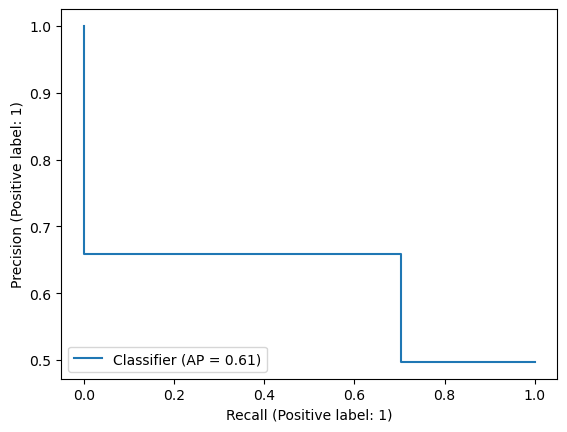

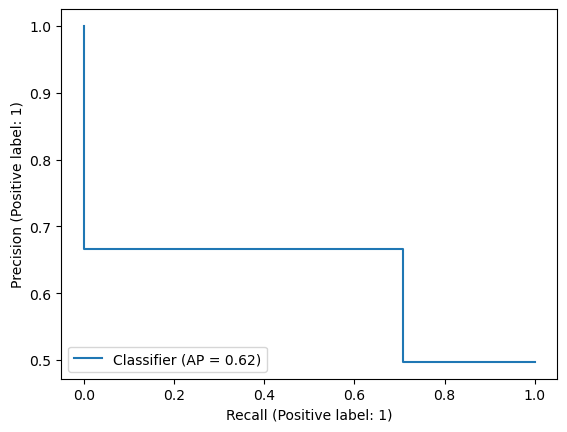

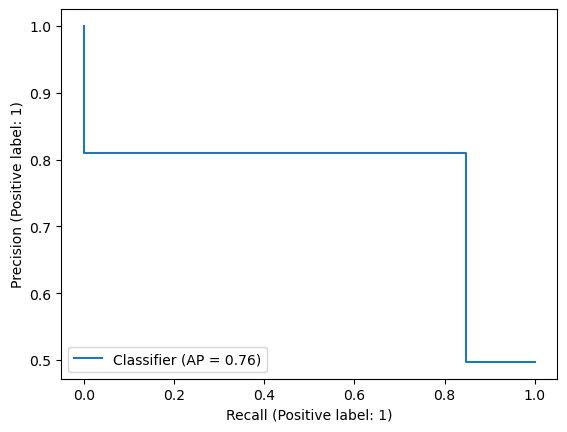

In [25]:
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha = 1)

# create model that predicts games win / loss based on previous game (n = 1) performance
# Test / Train Split
features = seasonAllStatSplitPred.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])

label = seasonAllStatSplitPred['present_win']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3)
# create complex Logistic Regression  
log_model = LogisticRegression(max_iter=2000, verbose=2, random_state=42)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

clear_output(wait=True)

##################
rr.fit(x_train, y_train)
y_pred_rr = rr.predict(x_test)
print('Ridge Classifier: ' + '\t' + str(metrics.accuracy_score(y_test, y_pred_rr)))
print('Ridge Classifier - Recall: ' + '\t' + str(metrics.recall_score(y_test, y_pred_rr, average='macro')))
metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred_rr)
####################
print('Logistic Regression: ' + '\t' + str(metrics.accuracy_score(y_test, y_pred_log)))
print('Logistic Regression - Recall: ' + '\t' + str(metrics.recall_score(y_test, y_pred_log, average='macro')))
metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred_log)
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Random Forest: ' + '\t\t' + str(metrics.accuracy_score(y_test, y_pred_rf)))
print('Random Forest - Recall: ' + '\t' + str(metrics.recall_score(y_test, y_pred_rf, average='macro')))
metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf)

In [26]:
# nba_teams_name.sort()
# nba_teams_name

In [27]:
# Test / Train Split
def randomForest(features_in, label_in, team_home, team_away):
    home_win_avg_list = list()
    away_win_avg_list = list()

    for i in range(10):  

        x_train, x_test, y_train, y_test = train_test_split(features_in, label_in, test_size = 0.3)

        rf = RandomForestClassifier(random_state=42)
        rf.fit(x_train, y_train)
        # y_pred_rf = rf.predict(x_test)

        # log_model = LogisticRegression(max_iter=20000, verbose=2, random_state=42)
        # log_model.fit(x_train, y_train)
        # y_pred_log = log_model.predict(x_test)

        testTestTest = pd.DataFrame([team_home, team_away])
        testTestTestTest = testTestTest.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])
        # make a prediction
        ynew = rf.predict(testTestTestTest)
        # ynew = log_model.predict(testTestTestTest)

        # print("Predicted Home Win = %s" % ynew[0])
        home_win_avg_list.append(ynew[0])
        # print("Predicted Away Win = %s" % ynew[1])
        away_win_avg_list.append(ynew[1])

    print("Final predicted win: ")
    print("Predicted %s Home Win = %s" % (home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(home_win_avg_list).value_counts()) / (len(home_win_avg_list)) * 100)))
    print("Predicted %s Away Win = %s" % (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(away_win_avg_list).value_counts()) / (len(away_win_avg_list)) * 100)))

In [28]:
# Test / Train Split
def ridgeClassifier(features_in, label_in, team_home, team_away):
    home_win_avg_list = list()
    away_win_avg_list = list()

    for i in range(10):  

        x_train, x_test, y_train, y_test = train_test_split(features_in, label_in, test_size = 0.3)

        rr = RidgeClassifier(alpha = 1)
        rr.fit(x_train, y_train)
        # y_pred_rf = rf.predict(x_test)

        # log_model = LogisticRegression(max_iter=20000, verbose=2, random_state=42)
        # log_model.fit(x_train, y_train)
        # y_pred_log = log_model.predict(x_test)

        testTestTest = pd.DataFrame([team_home, team_away])
        testTestTestTest = testTestTest.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])
        # make a prediction
        ynew = rr.predict(testTestTestTest)
        # ynew = log_model.predict(testTestTestTest)

        # print("Predicted Home Win = %s" % ynew[0])
        home_win_avg_list.append(ynew[0])
        # print("Predicted Away Win = %s" % ynew[1])
        away_win_avg_list.append(ynew[1])

    print("Final predicted win: ")
    print("Predicted %s Home Win = %s" % (home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(home_win_avg_list).value_counts()) / (len(home_win_avg_list)) * 100)))
    print("Predicted %s Away Win = %s" % (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(away_win_avg_list).value_counts()) / (len(away_win_avg_list)) * 100)))

In [29]:
# Test / Train Split
def logRegression(features_in, label_in, team_home, team_away):
    home_win_avg_list = list()
    away_win_avg_list = list()

    for i in range(10):  

        x_train, x_test, y_train, y_test = train_test_split(features_in, label_in, test_size = 0.3)

        # rf = RandomForestClassifier(random_state=42)
        # rf.fit(x_train, y_train)
        # y_pred_rf = rf.predict(x_test)

        log_model = LogisticRegression(max_iter=20000, verbose=2, random_state=42)
        log_model.fit(x_train, y_train)
        # y_pred_log = log_model.predict(x_test)

        testTestTest = pd.DataFrame([team_home, team_away])
        testTestTestTest = testTestTest.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])
        # make a prediction
        # ynew = rf.predict(testTestTestTest)
        ynew = log_model.predict(testTestTestTest)
        # print("Predicted Home Win = %s" % ynew[0])
        home_win_avg_list.append(ynew[0])
        # print("Predicted Away Win = %s" % ynew[1])
        away_win_avg_list.append(ynew[1])

        # clear_output(wait=True)

    print("Final predicted win: ")
    print("Predicted %s Home Win = %s" % (home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(home_win_avg_list).value_counts()) / (len(home_win_avg_list)) * 100)))
    print("Predicted %s Away Win = %s" % (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(away_win_avg_list).value_counts()) / (len(away_win_avg_list)) * 100)))

In [43]:
# Query nba.live.endpoints.scoreboard and  list games in localTimeZone
from datetime import datetime, timezone
from dateutil import parser
from nba_api.live.nba.endpoints import scoreboard

f = "{gameId}: {homeTeam} vs. {awayTeam}" 

game_pair = list()

board = scoreboard.ScoreBoard()
print("ScoreBoardDate: " + board.score_board_date)
games = board.games.get_dict()
for game in games:
    gameTimeLTZ = parser.parse(game["gameTimeUTC"]).replace(tzinfo=timezone.utc).astimezone(tz=None)
    print(f.format(gameId=game['gameId'], 
                   awayTeam=(game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName']), 
                   homeTeam=(game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName'])))
    if ((game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName'])) == 'LA Clippers':
        game_pair.append(('Los Angeles Clippers', (game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName'])))
    elif ((game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName'])) == 'LA Clippers':
        game_pair.append(((game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName']), 'Los Angeles Clippers'))
    else: 
        game_pair.append(((game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName']), (game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName'])))

ScoreBoardDate: 2022-11-02
0022200108: Philadelphia 76ers vs. Washington Wizards
0022200107: Cleveland Cavaliers vs. Boston Celtics
0022200109: Miami Heat vs. Sacramento Kings
0022200110: New York Knicks vs. Atlanta Hawks
0022200111: Chicago Bulls vs. Charlotte Hornets
0022200112: Houston Rockets vs. LA Clippers
0022200113: Milwaukee Bucks vs. Detroit Pistons
0022200114: San Antonio Spurs vs. Toronto Raptors
0022200115: Dallas Mavericks vs. Utah Jazz
0022200116: Portland Trail Blazers vs. Memphis Grizzlies
0022200117: Los Angeles Lakers vs. New Orleans Pelicans


In [47]:
game_pair = [('Orlando Magic','Golden State Warriors'), ('Oklahoma City Thunder','Denver Nuggets')]

seasonAllStatSplitPredDict = seasonAllStatSplitPred.to_dict('records')
# seasonAllStatSplitPredDict.reverse()

for game in game_pair:

    home_name = game[0]
    away_name = game[1]

    Home_ID = nba_teams_tri[nba_teams_name.index(home_name)]
    Away_ID = nba_teams_tri[nba_teams_name.index(away_name)]

    gamePairList_one = list()
    gamePairList_one_elo = list()
    gamePairList_Two = list()
    gamePairList_Two_elo = list()
    for game in seasonAllStatSplitPredDict:
        if game['team_name'] == Home_ID and game['opp_name'] == Away_ID:
            gamePairList_one.append(game)
        if game['team_name'] == Away_ID and game['opp_name'] == Home_ID:
            gamePairList_Two.append(game)
        if game['team_name'] == Home_ID:
            gamePairList_one_elo.append(game)
        if game['team_name'] == Away_ID:
            gamePairList_Two_elo.append(game)
    #print('Last Face Off Bucks Home:')
    #print(gamePairList_one[1])
    #print(gamePairList_Two[1])
    #print('Last ELO Home:')
    #print(gamePairList_one_elo[0])
    #print('Last ELO Away:')
    #print(gamePairList_Two_elo[0])

    teamHome = gamePairList_one[1].copy()
    teamHome['present_team_elo'] = (gamePairList_one_elo[0]['team_elo'] * 0.75) + (0.25 * 1505)
    teamHome['present_opp_elo'] = (gamePairList_Two_elo[0]['opp_elo'] * 0.75) + (0.25 * 1505)
    teamHome['present_home_court'] = 1
    teamAway = gamePairList_Two[1].copy() 
    teamAway['present_team_elo'] = (gamePairList_Two_elo[0]['team_elo'] * 0.75) + (0.25 * 1505)
    teamAway['present_opp_elo'] = (gamePairList_one_elo[0]['opp_elo'] * 0.75) + (0.25 * 1505)
    teamAway['present_home_court'] = 0
    
    print('###################################################################################')
    randomForest(features, label, teamHome, teamAway)
    print()
    ridgeClassifier(features, label, teamHome, teamAway)
    print()
    logRegression(features, label, teamHome, teamAway)
    print()
    print('###################################################################################')

###################################################################################
Final predicted win: 
Predicted Orlando Magic Home Win = 1
Confidence: 1    90.0
0    10.0
dtype: float64
Predicted Golden State Warriors Away Win = 0
Confidence: 0    100.0
dtype: float64

Final predicted win: 
Predicted Orlando Magic Home Win = 1
Confidence: 1    100.0
dtype: float64
Predicted Golden State Warriors Away Win = 0
Confidence: 0    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Orlando Magic Home Win = 1
Confidence: 1    100.0
dtype: float64
Predicted Golden State Warriors Away Win = 0
Confidence: 0    100.0
dtype: float64

###################################################################################
###################################################################################
Final predicted win: 
Predicted Oklahoma City Thunder Home Win = 1
Confidence: 1    60.0
0    40.0
dtype: float64
Predicted Denver Nuggets Away Win = 0
Confidence: 0    80.0
1    20.0
dtype: float64

Final predicted win: 
Predicted Oklahoma City Thunder Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Denver Nuggets Away Win = 1
Confidence: 1    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Oklahoma City Thunder Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Denver Nuggets Away Win = 1
Confidence: 1    100.0
dtype: float64

###################################################################################


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
